In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")


In [3]:
train['source']='train'
test['source']='test'
data = pd.concat([train, test],ignore_index=True)
print (train.shape, test.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


In [4]:
print(data.apply(lambda x:sum(x.isnull()),axis=0))

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64


In [5]:
print(data.describe())

           Item_MRP  Item_Outlet_Sales  Item_Visibility   Item_Weight  \
count  14204.000000        8523.000000     14204.000000  11765.000000   
mean     141.004977        2181.288914         0.065953     12.792854   
std       62.086938        1706.499616         0.051459      4.652502   
min       31.290000          33.290000         0.000000      4.555000   
25%       94.012000         834.247400         0.027036      8.710000   
50%      142.247000        1794.331000         0.054021     12.600000   
75%      185.855600        3101.296400         0.094037     16.750000   
max      266.888400       13086.964800         0.328391     21.350000   

       Outlet_Establishment_Year  
count               14204.000000  
mean                 1997.830681  
std                     8.371664  
min                  1985.000000  
25%                  1987.000000  
50%                  1999.000000  
75%                  2004.000000  
max                  2009.000000  


In [6]:
print(data.describe(include=[object]))

       Item_Fat_Content Item_Identifier              Item_Type  \
count             14204           14204                  14204   
unique                5            1559                     16   
top             Low Fat           NCC07  Fruits and Vegetables   
freq               8485              10                   2013   

       Outlet_Identifier Outlet_Location_Type Outlet_Size        Outlet_Type  \
count              14204                14204       10188              14204   
unique                10                    3           3                  4   
top               OUT027               Tier 3      Medium  Supermarket Type1   
freq                1559                 5583        4655               9294   

       source  
count   14204  
unique      2  
top     train  
freq     8523  


In [7]:
print(data.apply(lambda x: len(x.unique())))


Item_Fat_Content                 5
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3494
Item_Type                       16
Item_Visibility              13006
Item_Weight                    416
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      4
Outlet_Type                      4
source                           2
dtype: int64


In [8]:
#Filter categorical variables
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']
#Exclude ID cols and source:
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier','Outlet_Identifier','source']]
#Print frequency of categories
for col in categorical_columns:
    print ('\nFrequency of Categories for varible %s'%col)
    print (data[col].value_counts())


Frequency of Categories for varible Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for varible Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency of Categories for varible Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

Frequency of Categories for varible Outlet_Size
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

F

In [9]:
#Determine the average weight per item:
impute = data.pivot_table(values='Item_Weight', index=['Item_Identifier','Item_Type'])
for i,row in data.loc[data["Item_Weight"].isnull(),:].iterrows():
    ind = tuple([row['Item_Identifier'],row['Item_Type']])
    data.loc[i,"Item_Weight"]=impute.loc[ind].values[0]

In [10]:
data["Item_Visibility"]=data["Item_Visibility"].replace(0,data["Item_Visibility"].mean(),regex=True)

In [11]:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [12]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})
print(data['Item_Fat_Content'].value_counts())

data.loc[data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
data['Item_Fat_Content'].value_counts()

data["Outlet_Location_Type"].value_counts()


Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

In [13]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Item_Type_Combined',"Item_Type"]
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [14]:

data["Outlet_Type"].value_counts()


Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

In [15]:
data['Outlet_Size'] = data['Outlet_Size'].map({'Medium,': 1, 'Small': 0,"High" :3})
data['Outlet_Type'] = data['Outlet_Type'].map({'Supermarket Type1': 0, 'Supermarket Type2': 1,"Supermarket Type3":2,"Grocery Store" :3})


In [16]:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet'])

In [17]:
data.dtypes

Item_Identifier                 object
Item_MRP                       float64
Item_Outlet_Sales              float64
Item_Type                        int64
Item_Visibility                float64
Item_Weight                    float64
Outlet_Establishment_Year        int64
Outlet_Identifier               object
source                          object
Item_Fat_Content_0               uint8
Item_Fat_Content_1               uint8
Item_Fat_Content_2               uint8
Outlet_Location_Type_Tier 1      uint8
Outlet_Location_Type_Tier 2      uint8
Outlet_Location_Type_Tier 3      uint8
Outlet_Size_0.0                  uint8
Outlet_Size_3.0                  uint8
Outlet_Type_0                    uint8
Outlet_Type_1                    uint8
Outlet_Type_2                    uint8
Outlet_Type_3                    uint8
Item_Type_Combined_0             uint8
Item_Type_Combined_1             uint8
Item_Type_Combined_2             uint8
Outlet_0                         uint8
Outlet_1                 

In [18]:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

In [19]:
#Define target and ID columns:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']
from sklearn import cross_validation, metrics
def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    #Perform cross-validation:
    cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain[target], cv=20, scoring='mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print ("\nModel Report")
    print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions)))
    print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)

/usr/local/lib/python3.4/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


['Item_MRP', 'Item_Visibility', 'Item_Weight', 'Item_Fat_Content_0', 'Item_Fat_Content_1', 'Item_Fat_Content_2', 'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3', 'Outlet_Size_0.0', 'Outlet_Size_3.0', 'Outlet_Type_0', 'Outlet_Type_1', 'Outlet_Type_2', 'Outlet_Type_3', 'Item_Type_Combined_0', 'Item_Type_Combined_1', 'Item_Type_Combined_2', 'Outlet_0', 'Outlet_1', 'Outlet_2', 'Outlet_3', 'Outlet_4', 'Outlet_5', 'Outlet_6', 'Outlet_7', 'Outlet_8', 'Outlet_9']

Model Report
RMSE : 1127
CV Score : Mean - 1129 | Std - 43.47 | Min - 1075 | Max - 1210


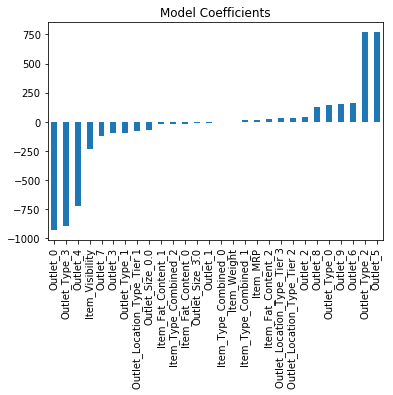

In [25]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression, Ridge, Lasso
predictors = [x for x in train.columns if x not in [target]+IDcol]
# print predictors
alg1 = LinearRegression(normalize=True)
modelfit(alg1, train, test, predictors, target, IDcol, 'alg1.csv')
coef1 = pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')
plt.show()


Model Report
RMSE : 1129
CV Score : Mean - 1130 | Std - 44.75 | Min - 1076 | Max - 1217


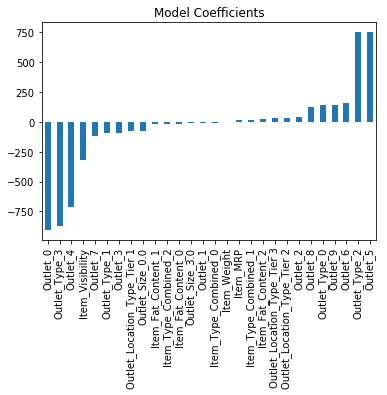

In [21]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg2 = Ridge(alpha=0.05,normalize=True)
modelfit(alg2, train, test, predictors, target, IDcol, 'alg2.csv')
coef2 = pd.Series(alg2.coef_, predictors).sort_values()
coef2.plot(kind='bar', title='Model Coefficients')
plt.show()


Model Report
RMSE : 1060
CV Score : Mean - 1090 | Std - 43.47 | Min - 1014 | Max - 1177


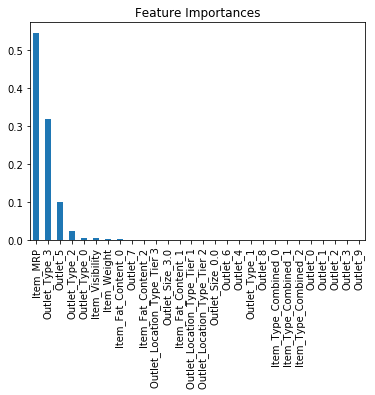

In [22]:
from sklearn.tree import DecisionTreeRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg3 = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(alg3, train, test, predictors, target, IDcol, 'alg3.csv')
coef3 = pd.Series(alg3.feature_importances_, predictors).sort_values(ascending=False)
coef3.plot(kind='bar', title='Feature Importances')
plt.show()


Model Report
RMSE : 1154
CV Score : Mean - 1174 | Std - 42.79 | Min - 1108 | Max - 1252


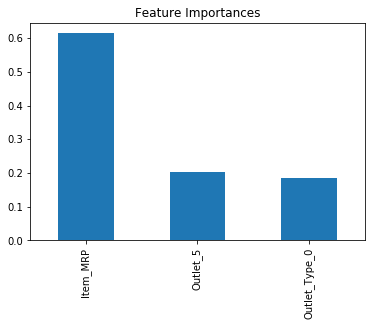

In [23]:
predictors = ['Item_MRP','Outlet_Type_0','Outlet_5']
alg4 = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)
modelfit(alg4, train, test, predictors, target, IDcol, 'alg4.csv')
coef4 = pd.Series(alg4.feature_importances_, predictors).sort_values(ascending=False)
coef4.plot(kind='bar', title='Feature Importances')
plt.show()


Model Report
RMSE : 1074
CV Score : Mean - 1084 | Std - 43.58 | Min - 1021 | Max - 1162


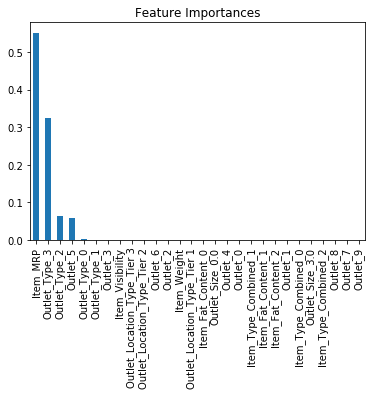

In [24]:
from sklearn.ensemble import RandomForestRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg5 = RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4)
modelfit(alg5, train, test, predictors, target, IDcol, 'alg5.csv')
coef5 = pd.Series(alg5.feature_importances_, predictors).sort_values(ascending=False)
coef5.plot(kind='bar', title='Feature Importances')
plt.show()

In [28]:
corr=train.corr()
print(corr)

                             Item_MRP  Item_Outlet_Sales  Item_Visibility  \
Item_MRP                     1.000000           0.567574        -0.005248   
Item_Outlet_Sales            0.567574           1.000000        -0.134141   
Item_Visibility             -0.005248          -0.134141         1.000000   
Item_Weight                  0.026172           0.013261        -0.017943   
Item_Fat_Content_0          -0.009619          -0.009438         0.007005   
Item_Fat_Content_1           0.004859          -0.010861        -0.070033   
Item_Fat_Content_2           0.006063           0.018719         0.049914   
Outlet_Location_Type_Tier 1 -0.001229          -0.111287         0.063746   
Outlet_Location_Type_Tier 2  0.001951           0.058261        -0.073790   
Outlet_Location_Type_Tier 3 -0.000744           0.046376         0.012248   
Outlet_Size_0.0              0.009793          -0.098403         0.066381   
Outlet_Size_3.0              0.002438           0.024170        -0.043640   